<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_CursoPython/blob/main/Modulo3_RedesNeuronales/RedesNeuronales_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicacion de las redes neuronales en problemas de regresión

In [8]:
# Ejemplo de regresión con dataset no lineal (Friedman #1)

from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## El conjunto de datos sintético Friedman #1,

un clásico para probar métodos de regresión no lineales. Este problema es famoso porque:

La relación entre $X$ e  $y$  es altamente no lineal
La regresión lineal falla al capturar esos efectos, mientras que una red neuronal con capas ocultas sí puede aproximarlos.

$$
y=10sin(π X_1 X_2)+20(X_3−0.5)^2 +10X_4+5X_5 +ε
$$

In [9]:
# 1. Crear datos
X, y = make_friedman1(n_samples=1000, n_features=10, noise=1.0, random_state=42)

In [10]:
# 2. Dividir y escalar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [11]:
# 3. Modelo base: regresión lineal
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Regresión Lineal - MSE:", mean_squared_error(y_test, y_pred_lr))
print("Regresión Lineal - R2:", r2_score(y_test, y_pred_lr))

Regresión Lineal - MSE: 5.470848131867546
Regresión Lineal - R2: 0.7540809065032895


In [12]:
# 4. Red neuronal con Keras
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(4, activation='relu'),
    Dense(1)  # regresión: una salida
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, verbose=0)

# Evaluación
mse_nn, mae_nn = model.evaluate(X_test_scaled, y_test, verbose=0)
y_pred_nn = model.predict(X_test_scaled).flatten()
print("Red Neuronal - MSE:", mse_nn)
print("Red Neuronal - R2:", r2_score(y_test, y_pred_nn))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Red Neuronal - MSE: 6.352570056915283
Red Neuronal - R2: 0.7144468050554295


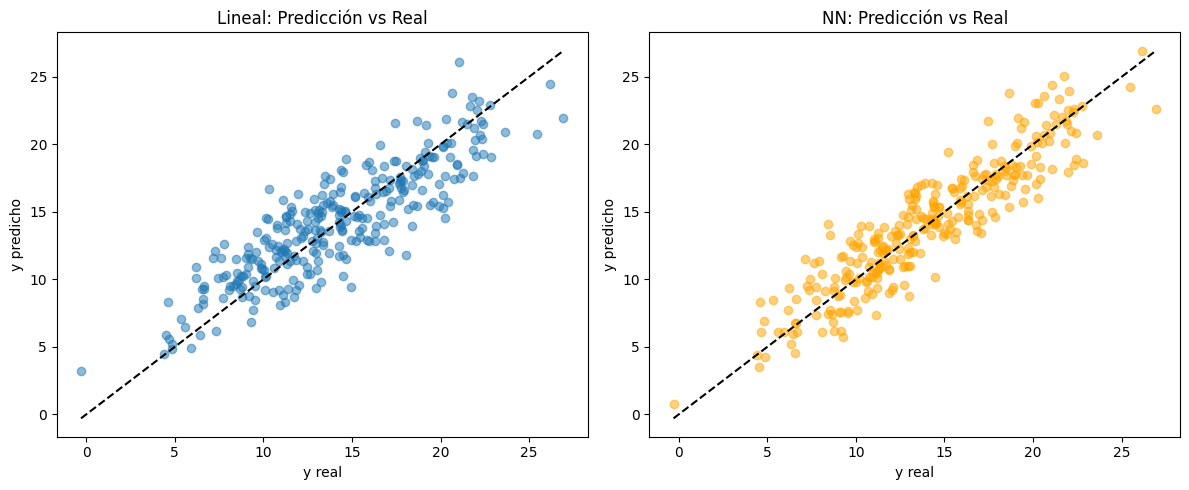

In [6]:
# 5. Comparación gráfica
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("Lineal: Predicción vs Real")
plt.xlabel("y real")
plt.ylabel("y predicho")

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_nn, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("NN: Predicción vs Real")
plt.xlabel("y real")
plt.ylabel("y predicho")

plt.tight_layout()
plt.show()

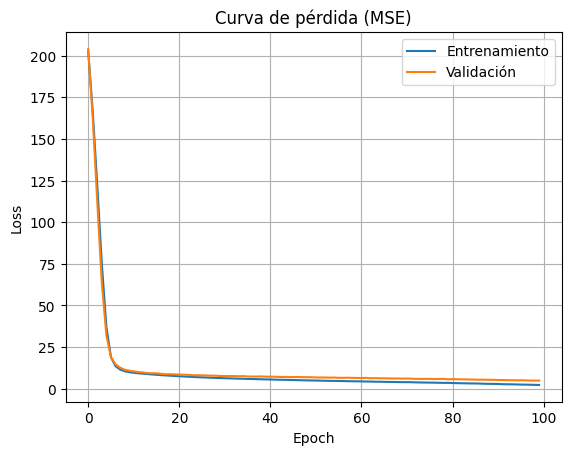

In [7]:
# 6. Curva de pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title("Curva de pérdida (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

### Gráfico de residuos vs valores predichos para la red neuronal

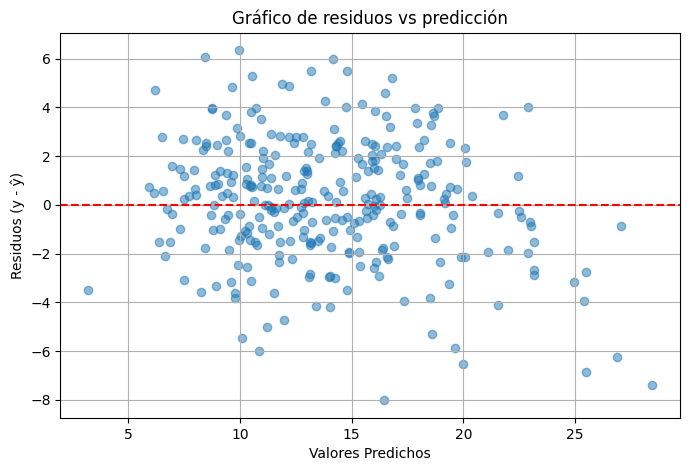

In [15]:
residuos = y_test - y_pred_nn

plt.figure(figsize=(8,5))
plt.scatter(y_pred_nn, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos (y - ŷ)')
plt.title('Gráfico de residuos vs predicción')
plt.grid(True)
plt.show()

### Gráfico de residuos vs valores predichos para la regresión lineal

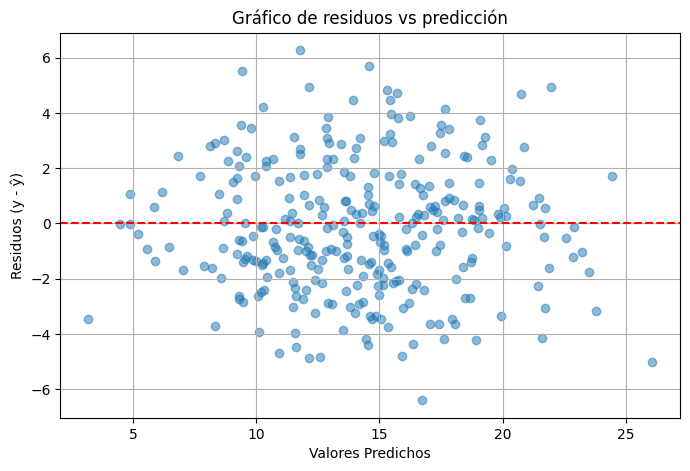

In [16]:
residuos = y_test - y_pred_lr

plt.figure(figsize=(8,5))
plt.scatter(y_pred_lr, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos (y - ŷ)')
plt.title('Gráfico de residuos vs predicción')
plt.grid(True)
plt.show()

# Ahora vamos (nuevamente) a calcular el precio del oro, con base en las otras variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# 1. Cargar datos

df = pd.read_csv('GoldUP.csv')

In [ ]:
# 2. Preprocesamiento básico
df = df.drop(['Date'], axis=1)  # eliminar columna de fecha si existe
# Separar características y objetivo
y = df['Price'].values
X = df.drop('Price', axis=1).values

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Escalado de características
dist_scaler = StandardScaler()
X_train_scaled = dist_scaler.fit_transform(X_train)
X_test_scaled = dist_scaler.transform(X_test)

In [ ]:
# 3. Definición del modelo MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # salida para regresión
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

In [ ]:
# 4. Entrenamiento
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

In [ ]:
# 5. Evaluación
# Predicciones
y_pred_train = model.predict(X_train_scaled).flatten()
y_pred_test = model.predict(X_test_scaled).flatten()

# Métricas
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Train MSE: {mse_train:.3f}, R2: {r2_train:.3f}")
print(f"Test  MSE: {mse_test:.3f}, R2: {r2_test:.3f}")

In [ ]:
# 6. Gráficos de análisis
plt.figure(figsize=(12, 5))

# 6.1 Curva de pérdida
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Curva de pérdida')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

# 6.2 Predicción vs real (test)
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Predicción vs Real (Test)')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')

# 6.3 Residuos vs predicción
residuals = y_test - y_pred_test
plt.subplot(1, 3, 3)
plt.scatter(y_pred_test, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Predicción')
plt.xlabel('Precio predicho')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()
